### Problem Definition

### Convert the Sign Alphabet to Text

### Data

#### 1.No cases for the letters J & Z (Reason: J & Z require motion)
#### 2.GrayScale Images
#### 3.Pixel Values Range From 0 to 255
#### 4.Each image contains 784 Pixels

#### Evaluation

##### Accuracy

#### Modelling

##### CNN

### Initial End-to-End Workflow (Start)

In [85]:
import tensorflow

In [2]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
# loading the training data (X+y)
train_df = pd.read_csv('sign_mnist_train.csv')

In [4]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [5]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [6]:
X.shape, y.shape

((27455, 784), (27455,))

In [7]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [8]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [9]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [10]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [11]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [12]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [13]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [14]:
X_train[0].dtype

tf.float64

In [15]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x1bf54ef8970>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

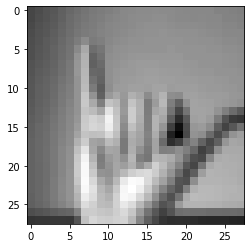

In [16]:
plt.imshow(X[0], cmap='gray'), y[0]

In [17]:
# Defining the CNN
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [21]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 0.7829 - accuracy: 0.7585

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 63s 76ms/step - loss: 0.7827 - accuracy: 0.7586 - val_loss: 0.0438 - val_accuracy: 0.9919
Epoch 2/20
781/782 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9970

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 47s 60ms/step - loss: 0.0132 - accuracy: 0.9970 - val_loss: 6.6028e-04 - val_accuracy: 1.0000
Epoch 3/20
782/782 [==============================] - 47s 60ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.3001 - val_accuracy: 0.8990
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9925

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 62ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 1.8522e-04 - val_accuracy: 1.0000
Epoch 5/20
781/782 [============================>.] - ETA: 0s - loss: 1.0612e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 61ms/step - loss: 1.0609e-04 - accuracy: 1.0000 - val_loss: 7.6026e-05 - val_accuracy: 1.0000
Epoch 6/20
781/782 [============================>.] - ETA: 0s - loss: 4.8763e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 62ms/step - loss: 4.8757e-05 - accuracy: 1.0000 - val_loss: 4.1444e-05 - val_accuracy: 1.0000
Epoch 7/20
781/782 [============================>.] - ETA: 0s - loss: 2.7491e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 61ms/step - loss: 2.7511e-05 - accuracy: 1.0000 - val_loss: 2.5013e-05 - val_accuracy: 1.0000
Epoch 8/20
781/782 [============================>.] - ETA: 0s - loss: 1.6806e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 46s 59ms/step - loss: 1.6819e-05 - accuracy: 1.0000 - val_loss: 1.5862e-05 - val_accuracy: 1.0000
Epoch 9/20
781/782 [============================>.] - ETA: 0s - loss: 1.0616e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 62ms/step - loss: 1.0634e-05 - accuracy: 1.0000 - val_loss: 1.1061e-05 - val_accuracy: 1.0000
Epoch 10/20
781/782 [============================>.] - ETA: 0s - loss: 6.9919e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 44s 57ms/step - loss: 6.9909e-06 - accuracy: 1.0000 - val_loss: 7.3712e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 4.6241e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 47s 60ms/step - loss: 4.6228e-06 - accuracy: 1.0000 - val_loss: 4.8711e-06 - val_accuracy: 1.0000
Epoch 12/20
781/782 [============================>.] - ETA: 0s - loss: 3.1008e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 47s 60ms/step - loss: 3.1003e-06 - accuracy: 1.0000 - val_loss: 3.1328e-06 - val_accuracy: 1.0000
Epoch 13/20
781/782 [============================>.] - ETA: 0s - loss: 2.0743e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 45s 57ms/step - loss: 2.0736e-06 - accuracy: 1.0000 - val_loss: 2.2050e-06 - val_accuracy: 1.0000
Epoch 14/20
781/782 [============================>.] - ETA: 0s - loss: 1.3922e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 47s 60ms/step - loss: 1.3927e-06 - accuracy: 1.0000 - val_loss: 1.5525e-06 - val_accuracy: 1.0000
Epoch 15/20
781/782 [============================>.] - ETA: 0s - loss: 9.3380e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 59s 76ms/step - loss: 9.3357e-07 - accuracy: 1.0000 - val_loss: 1.0401e-06 - val_accuracy: 1.0000
Epoch 16/20
781/782 [============================>.] - ETA: 0s - loss: 6.3115e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 63ms/step - loss: 6.3115e-07 - accuracy: 1.0000 - val_loss: 7.0616e-07 - val_accuracy: 1.0000
Epoch 17/20
781/782 [============================>.] - ETA: 0s - loss: 4.1507e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 62ms/step - loss: 4.1498e-07 - accuracy: 1.0000 - val_loss: 4.9611e-07 - val_accuracy: 1.0000
Epoch 18/20
781/782 [============================>.] - ETA: 0s - loss: 2.7391e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 48s 61ms/step - loss: 2.7383e-07 - accuracy: 1.0000 - val_loss: 3.2956e-07 - val_accuracy: 1.0000
Epoch 19/20
781/782 [============================>.] - ETA: 0s - loss: 1.8455e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 62ms/step - loss: 1.8481e-07 - accuracy: 1.0000 - val_loss: 2.3419e-07 - val_accuracy: 1.0000
Epoch 20/20
781/782 [============================>.] - ETA: 0s - loss: 1.2207e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


INFO:tensorflow:Assets written to: models\initial-end-to-end\assets


782/782 [==============================] - 49s 63ms/step - loss: 1.2205e-07 - accuracy: 1.0000 - val_loss: 1.5184e-07 - val_accuracy: 1.0000


In [22]:
history.history # Contains the training related information for each epoch

{'loss': [0.7826583385467529,
  0.013166194781661034,
  0.020567787811160088,
  0.024578383192420006,
  0.00010609371383907273,
  4.875666490988806e-05,
  2.751093234110158e-05,
  1.6819005395518616e-05,
  1.0633642887114547e-05,
  6.990883321122965e-06,
  4.622821961675072e-06,
  3.1003078220237512e-06,
  2.0736115402542055e-06,
  1.3927041209171875e-06,
  9.335731192550156e-07,
  6.311540232672996e-07,
  4.1497952452118625e-07,
  2.738276236868842e-07,
  1.8481206609521905e-07,
  1.220462593209959e-07],
 'accuracy': [0.7585999965667725,
  0.9970399737358093,
  0.9944400191307068,
  0.9924799799919128,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.04375440627336502,
  0.0006602781359106302,
  0.30007559061050415,
  0.00018521881429478526,
  7.602609548484907e-05,
  4.144422200624831e-05,
  2.501287053746637e-05,
  1.586182406754233e-05,
  1.1060787073802203e-05,
  7.371163519565016e-06,
  4.871099008596

In [23]:
# Saving the history object

with open('models/intial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [24]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.7826583385467529,
  0.013166194781661034,
  0.020567787811160088,
  0.024578383192420006,
  0.00010609371383907273,
  4.875666490988806e-05,
  2.751093234110158e-05,
  1.6819005395518616e-05,
  1.0633642887114547e-05,
  6.990883321122965e-06,
  4.622821961675072e-06,
  3.1003078220237512e-06,
  2.0736115402542055e-06,
  1.3927041209171875e-06,
  9.335731192550156e-07,
  6.311540232672996e-07,
  4.1497952452118625e-07,
  2.738276236868842e-07,
  1.8481206609521905e-07,
  1.220462593209959e-07],
 'accuracy': [0.7585999965667725,
  0.9970399737358093,
  0.9944400191307068,
  0.9924799799919128,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.04375440627336502,
  0.0006602781359106302,
  0.30007559061050415,
  0.00018521881429478526,
  7.602609548484907e-05,
  4.144422200624831e-05,
  2.501287053746637e-05,
  1.586182406754233e-05,
  1.1060787073802203e-05,
  7.371163519565016e-06,
  4.871099008596

In [25]:
best_model = keras.models.load_model('models/initial-end-to-end')

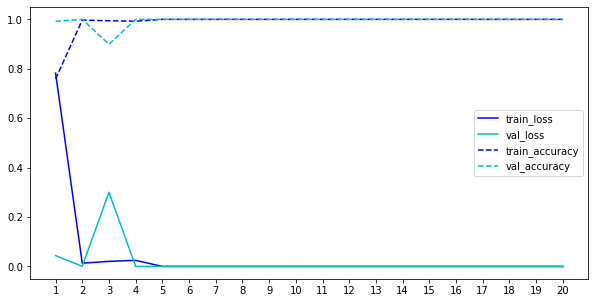

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

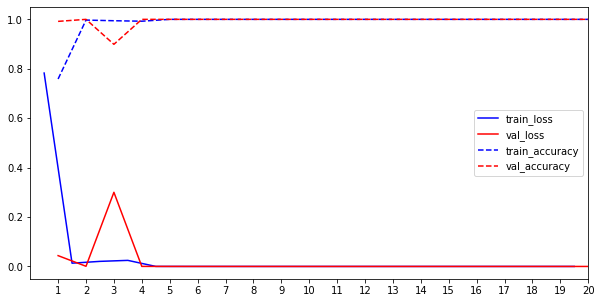

In [27]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [28]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

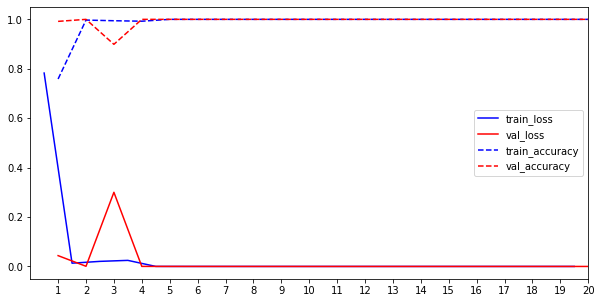

In [29]:
get_train_val_plots(h)

In [30]:
test_df = pd.read_csv('sign_mnist_test.csv') # Load the test data

In [31]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']


In [32]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])


In [33]:
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [34]:
y_test = label_binarizer.transform(y_test)

In [35]:
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [36]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 4s 15ms/step - loss: 127.3839 - accuracy: 0.9110


[127.3839340209961, 0.9110429286956787]

### Accuracy:91%

In [37]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [38]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 3s 14ms/step - loss: 127.3839 - accuracy: 0.9110
Loss: 127.384 Accuracy: 0.911


### Converting Images to a Sentence:

In [39]:
test_df = pd.read_csv('sign_mnist_test.csv') # Load the test data

In [40]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [41]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [42]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [43]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [44]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))


1/1 [==============================] - 0s 410ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 49ms/step
sign language


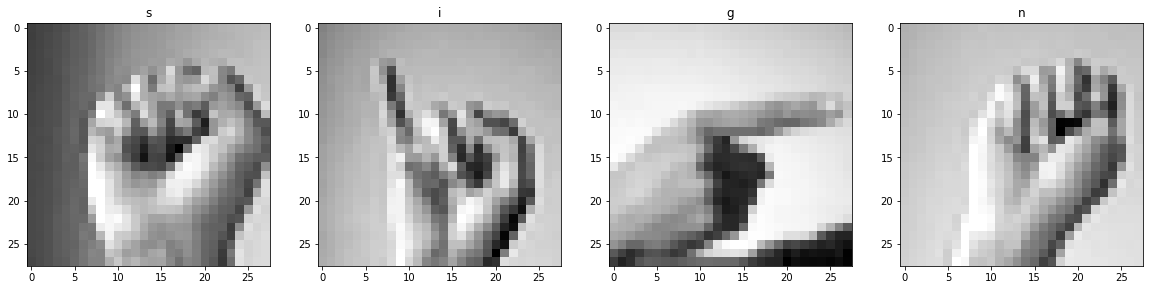

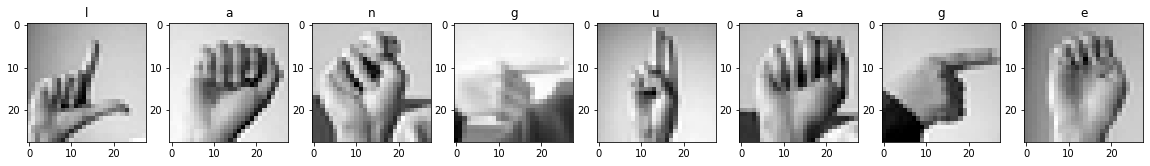

In [46]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [47]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 32ms/step
The actual sentence is "sign language"
The predicted sentence is "sign langkage"


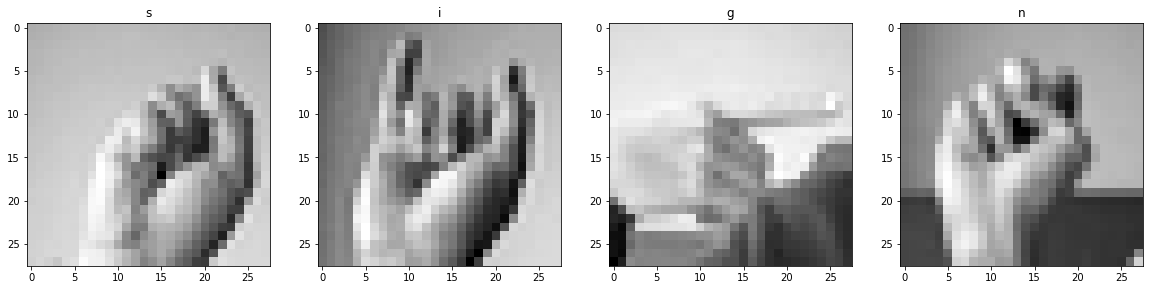

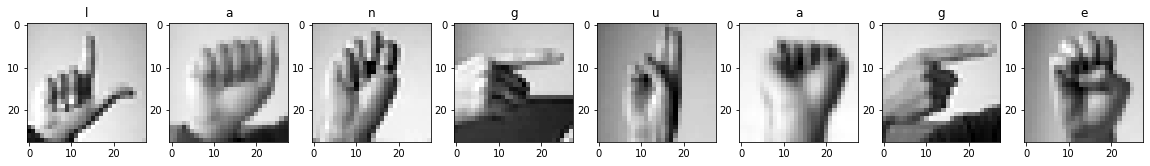

In [48]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

#### Initial End-to-End Workflow (End)
#### Hyperparameter Tuning
#### Convolution and Max Pooling Pairs
#### Filters in the convolution layers
#### Filter Shape
#### Dropout
#### Convolution and Max Pooling Pairs
#### Before flattening

#### For pair = 1 -> Output to the dense layer will be of the shape (None, 14, 14, 32)
#### For pair = 2 -> Output to the dense layer will be of the shape (None, 7, 7, 64)
#### For pair = 3 -> Output to the dense layer will be of the shape (None, 3, 3, 96)
#### For pair = 4 -> Output to the dense layer will be of the shape (None, 1, 1, 128)
#### As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [49]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [50]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
610/610 [==============================] - ETA: 0s - loss: 1.3487 - accuracy: 0.6186

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 15s 23ms/step - loss: 1.3487 - accuracy: 0.6186 - val_loss: 0.4369 - val_accuracy: 0.8918
Epoch 2/15
607/610 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.9429

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 15s 24ms/step - loss: 0.2421 - accuracy: 0.9431 - val_loss: 0.1117 - val_accuracy: 0.9876
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9951

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 21ms/step - loss: 0.0635 - accuracy: 0.9951 - val_loss: 0.0349 - val_accuracy: 0.9980
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 0.0215 - accuracy: 0.9995

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 21ms/step - loss: 0.0214 - accuracy: 0.9995 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 5/15
608/610 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 22ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/15
610/610 [==============================] - 12s 19ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.0515 - val_accuracy: 0.9821
Epoch 7/15
608/610 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9989

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 21ms/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 9.9616e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 22ms/step - loss: 9.9613e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 10/15
610/610 [==============================] - ETA: 0s - loss: 6.5922e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 12s 20ms/step - loss: 6.5922e-04 - accuracy: 1.0000 - val_loss: 6.5849e-04 - val_accuracy: 1.0000
Epoch 11/15
608/610 [============================>.] - ETA: 0s - loss: 4.6240e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 14s 23ms/step - loss: 4.6211e-04 - accuracy: 1.0000 - val_loss: 4.9373e-04 - val_accuracy: 1.0000
Epoch 12/15
609/610 [============================>.] - ETA: 0s - loss: 3.2111e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 22ms/step - loss: 3.2101e-04 - accuracy: 1.0000 - val_loss: 2.8055e-04 - val_accuracy: 1.0000
Epoch 13/15
608/610 [============================>.] - ETA: 0s - loss: 2.2604e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-1\assets


INFO:tensorflow:Assets written to: models\experiment-1-1\assets


610/610 [==============================] - 13s 21ms/step - loss: 2.2575e-04 - accuracy: 1.0000 - val_loss: 2.3396e-04 - val_accuracy: 1.0000
Epoch 14/15
610/610 [==============================] - 10s 17ms/step - loss: 0.0217 - accuracy: 0.9940 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 15/15
610/610 [==============================] - 11s 17ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 4.4164e-04 - val_accuracy: 1.0000
Epoch 1/15
609/610 [============================>.] - ETA: 0s - loss: 0.9217 - accuracy: 0.7249

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 31s 51ms/step - loss: 0.9212 - accuracy: 0.7250 - val_loss: 0.1043 - val_accuracy: 0.9736
Epoch 2/15
610/610 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9930

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 30s 49ms/step - loss: 0.0369 - accuracy: 0.9930 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3/15
610/610 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 29s 48ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/15
610/610 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 29s 47ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.6293e-04 - val_accuracy: 1.0000
Epoch 5/15
610/610 [==============================] - ETA: 0s - loss: 5.2721e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 30s 49ms/step - loss: 5.2721e-04 - accuracy: 1.0000 - val_loss: 4.2764e-04 - val_accuracy: 1.0000
Epoch 6/15
610/610 [==============================] - ETA: 0s - loss: 3.3224e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 29s 48ms/step - loss: 3.3224e-04 - accuracy: 1.0000 - val_loss: 3.5652e-04 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - ETA: 0s - loss: 1.8565e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 30s 49ms/step - loss: 1.8565e-04 - accuracy: 1.0000 - val_loss: 1.5086e-04 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 1.1011e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 46ms/step - loss: 1.1005e-04 - accuracy: 1.0000 - val_loss: 1.0030e-04 - val_accuracy: 1.0000
Epoch 9/15
610/610 [==============================] - ETA: 0s - loss: 7.4592e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 46ms/step - loss: 7.4592e-05 - accuracy: 1.0000 - val_loss: 7.2461e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 4.8768e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 47ms/step - loss: 4.8756e-05 - accuracy: 1.0000 - val_loss: 4.8130e-05 - val_accuracy: 1.0000
Epoch 11/15
609/610 [============================>.] - ETA: 0s - loss: 3.2430e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 47ms/step - loss: 3.2421e-05 - accuracy: 1.0000 - val_loss: 3.2053e-05 - val_accuracy: 1.0000
Epoch 12/15
610/610 [==============================] - ETA: 0s - loss: 2.3355e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 29s 47ms/step - loss: 2.3355e-05 - accuracy: 1.0000 - val_loss: 2.2819e-05 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - ETA: 0s - loss: 1.6983e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 29s 48ms/step - loss: 1.6983e-05 - accuracy: 1.0000 - val_loss: 1.6075e-05 - val_accuracy: 1.0000
Epoch 14/15
609/610 [============================>.] - ETA: 0s - loss: 1.0696e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 46ms/step - loss: 1.0691e-05 - accuracy: 1.0000 - val_loss: 1.4036e-05 - val_accuracy: 1.0000
Epoch 15/15
610/610 [==============================] - ETA: 0s - loss: 7.4066e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-2\assets


INFO:tensorflow:Assets written to: models\experiment-1-2\assets


610/610 [==============================] - 28s 46ms/step - loss: 7.4066e-06 - accuracy: 1.0000 - val_loss: 8.1644e-06 - val_accuracy: 1.0000
Epoch 1/15
609/610 [============================>.] - ETA: 0s - loss: 0.9322 - accuracy: 0.7125

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 39s 62ms/step - loss: 0.9316 - accuracy: 0.7127 - val_loss: 0.0522 - val_accuracy: 0.9878
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9970

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 38s 62ms/step - loss: 0.0176 - accuracy: 0.9970 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 9.0355e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 37s 60ms/step - loss: 9.0302e-04 - accuracy: 1.0000 - val_loss: 6.3681e-04 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 4.2219e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 35s 58ms/step - loss: 4.2214e-04 - accuracy: 1.0000 - val_loss: 2.8244e-04 - val_accuracy: 1.0000
Epoch 5/15
609/610 [============================>.] - ETA: 0s - loss: 1.8762e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 38s 62ms/step - loss: 1.8779e-04 - accuracy: 1.0000 - val_loss: 1.6363e-04 - val_accuracy: 1.0000
Epoch 6/15
609/610 [============================>.] - ETA: 0s - loss: 1.1587e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 1.1584e-04 - accuracy: 1.0000 - val_loss: 1.0290e-04 - val_accuracy: 1.0000
Epoch 7/15
609/610 [============================>.] - ETA: 0s - loss: 7.1170e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 36s 59ms/step - loss: 7.1233e-05 - accuracy: 1.0000 - val_loss: 7.9859e-05 - val_accuracy: 1.0000
Epoch 8/15
609/610 [============================>.] - ETA: 0s - loss: 4.4709e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 35s 57ms/step - loss: 4.4687e-05 - accuracy: 1.0000 - val_loss: 4.3007e-05 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 3.0821e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 34s 55ms/step - loss: 3.0807e-05 - accuracy: 1.0000 - val_loss: 3.2101e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 2.0848e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 34s 56ms/step - loss: 2.0845e-05 - accuracy: 1.0000 - val_loss: 2.1048e-05 - val_accuracy: 1.0000
Epoch 11/15
609/610 [============================>.] - ETA: 0s - loss: 1.3129e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 35s 57ms/step - loss: 1.3125e-05 - accuracy: 1.0000 - val_loss: 1.4204e-05 - val_accuracy: 1.0000
Epoch 12/15
610/610 [==============================] - ETA: 0s - loss: 9.1519e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 34s 56ms/step - loss: 9.1519e-06 - accuracy: 1.0000 - val_loss: 9.9360e-06 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - ETA: 0s - loss: 6.3325e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 35s 58ms/step - loss: 6.3325e-06 - accuracy: 1.0000 - val_loss: 6.9345e-06 - val_accuracy: 1.0000
Epoch 14/15
609/610 [============================>.] - ETA: 0s - loss: 4.2549e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-1-3\assets


INFO:tensorflow:Assets written to: models\experiment-1-3\assets


610/610 [==============================] - 35s 58ms/step - loss: 4.2536e-06 - accuracy: 1.0000 - val_loss: 4.9866e-06 - val_accuracy: 1.0000
Epoch 15/15
610/610 [==============================] - 33s 54ms/step - loss: 3.1277e-06 - accuracy: 1.0000 - val_loss: 1.6709e-04 - val_accuracy: 1.0000


In [53]:
models_pairs[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
________________________________________________

In [54]:
models_pairs[1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [55]:
models_pairs[2].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 96)        

In [56]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 3s 11ms/step - loss: 4.9866e-06 - accuracy: 1.0000


In [57]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

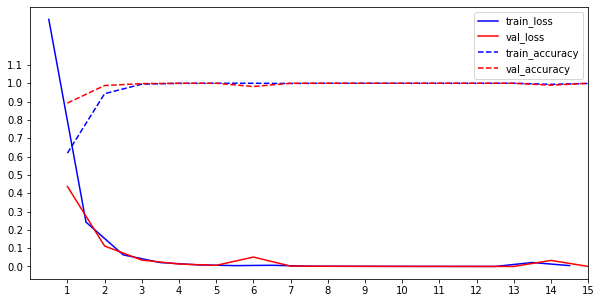

In [58]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

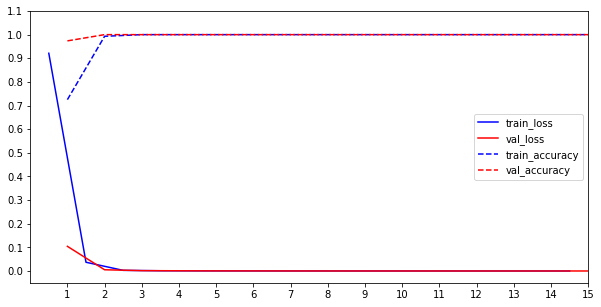

In [59]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

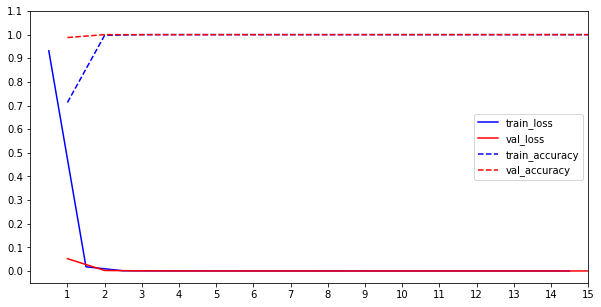

In [60]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

#### Model 3 has the least loss on the validation data
#### Filters
#### Our Models now contains 3 pairs of Convolution and Pooling layers
#### Number of filters maps can be
#### 8 - 16 - 32
#### 16 - 32 - 64
#### 24 - 48 - 96

In [61]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 1.2174 - accuracy: 0.6228

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 17s 26ms/step - loss: 1.2152 - accuracy: 0.6235 - val_loss: 0.4020 - val_accuracy: 0.8606
Epoch 2/10
607/610 [============================>.] - ETA: 0s - loss: 0.1174 - accuracy: 0.9669

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 16s 26ms/step - loss: 0.1171 - accuracy: 0.9670 - val_loss: 0.0363 - val_accuracy: 0.9940
Epoch 3/10
608/610 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9930

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 16s 27ms/step - loss: 0.0308 - accuracy: 0.9930 - val_loss: 0.0053 - val_accuracy: 0.9999
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 16s 26ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/10
610/610 [==============================] - 13s 22ms/step - loss: 0.0528 - accuracy: 0.9851 - val_loss: 0.0709 - val_accuracy: 0.9781
Epoch 6/10
607/610 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9940

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 25ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 6.2933e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 25ms/step - loss: 6.2899e-04 - accuracy: 1.0000 - val_loss: 5.0958e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 2.9645e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 25ms/step - loss: 2.9645e-04 - accuracy: 1.0000 - val_loss: 3.2335e-04 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 1.9266e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 25ms/step - loss: 1.9239e-04 - accuracy: 1.0000 - val_loss: 2.1318e-04 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 1.3200e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-1\assets


610/610 [==============================] - 15s 25ms/step - loss: 1.3204e-04 - accuracy: 1.0000 - val_loss: 1.7380e-04 - val_accuracy: 1.0000
Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 1.0675 - accuracy: 0.6702

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 22s 35ms/step - loss: 1.0654 - accuracy: 0.6709 - val_loss: 0.2204 - val_accuracy: 0.9280
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9794

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 21s 34ms/step - loss: 0.0710 - accuracy: 0.9794 - val_loss: 0.0114 - val_accuracy: 0.9996
Epoch 3/10
610/610 [==============================] - 19s 32ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.0129 - val_accuracy: 0.9965
Epoch 4/10
608/610 [============================>.] - ETA: 0s - loss: 0.0342 - accuracy: 0.9891

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 21s 34ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 7.8293e-04 - val_accuracy: 1.0000
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 4.2415e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 21s 34ms/step - loss: 4.2403e-04 - accuracy: 1.0000 - val_loss: 2.8219e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.9328e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 21s 34ms/step - loss: 1.9318e-04 - accuracy: 1.0000 - val_loss: 1.6165e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 1.1785e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 20s 33ms/step - loss: 1.1784e-04 - accuracy: 1.0000 - val_loss: 1.0883e-04 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 7.9492e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 20s 34ms/step - loss: 7.9471e-05 - accuracy: 1.0000 - val_loss: 7.3943e-05 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 5.5833e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 20s 33ms/step - loss: 5.5802e-05 - accuracy: 1.0000 - val_loss: 5.4876e-05 - val_accuracy: 1.0000
Epoch 10/10
608/610 [============================>.] - ETA: 0s - loss: 3.8862e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-2\assets


610/610 [==============================] - 20s 33ms/step - loss: 3.8878e-05 - accuracy: 1.0000 - val_loss: 3.8269e-05 - val_accuracy: 1.0000
Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 0.9737 - accuracy: 0.6989

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 30s 49ms/step - loss: 0.9731 - accuracy: 0.6991 - val_loss: 0.1319 - val_accuracy: 0.9633
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9922

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 29s 47ms/step - loss: 0.0355 - accuracy: 0.9922 - val_loss: 0.0113 - val_accuracy: 0.9981
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9981

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 29s 48ms/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.0085 - val_accuracy: 0.9986
Epoch 4/10
610/610 [==============================] - 27s 44ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0121 - val_accuracy: 0.9966
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9978

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 28s 46ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 1.6747e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.0783e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 29s 47ms/step - loss: 1.0781e-04 - accuracy: 1.0000 - val_loss: 7.7380e-05 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 5.5698e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 28s 46ms/step - loss: 5.5664e-05 - accuracy: 1.0000 - val_loss: 4.6144e-05 - val_accuracy: 1.0000
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 3.4487e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 27s 45ms/step - loss: 3.4473e-05 - accuracy: 1.0000 - val_loss: 3.0598e-05 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 2.3353e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 28s 45ms/step - loss: 2.3353e-05 - accuracy: 1.0000 - val_loss: 2.1576e-05 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - ETA: 0s - loss: 1.6175e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


INFO:tensorflow:Assets written to: models\experiment-fmaps-3\assets


610/610 [==============================] - 31s 52ms/step - loss: 1.6175e-05 - accuracy: 1.0000 - val_loss: 1.5572e-05 - val_accuracy: 1.0000


In [62]:
models[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 32)        

In [63]:
models[1].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

In [64]:
models[2].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 96)        

In [65]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)


249/249 [==============================] - 3s 10ms/step - loss: 1.5572e-05 - accuracy: 1.0000


In [66]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

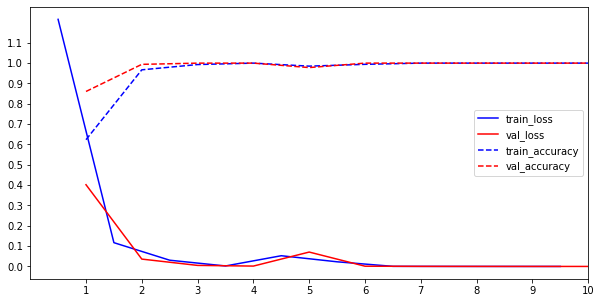

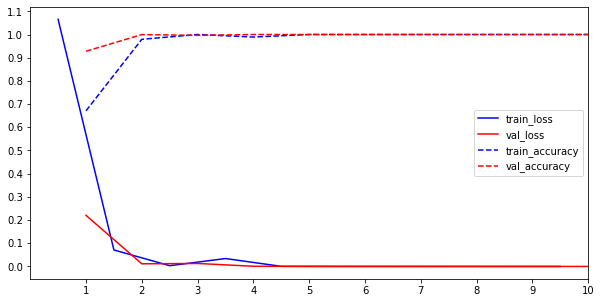

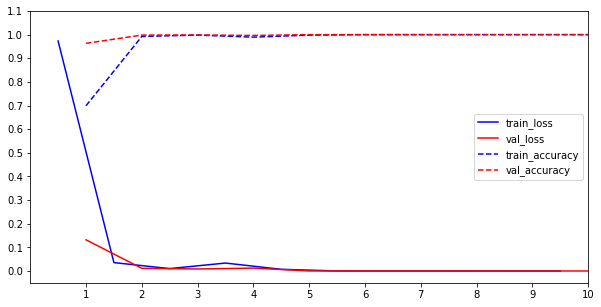

In [67]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

#### Choose Model 3
#### Filter Size

In [68]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.0432 - accuracy: 0.6808

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 19s 29ms/step - loss: 1.0426 - accuracy: 0.6810 - val_loss: 0.1666 - val_accuracy: 0.9519
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.0584 - accuracy: 0.9854

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 17s 28ms/step - loss: 0.0586 - accuracy: 0.9854 - val_loss: 0.0342 - val_accuracy: 0.9921
Epoch 3/10
610/610 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9990

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 30ms/step - loss: 0.0085 - accuracy: 0.9990 - val_loss: 0.0117 - val_accuracy: 0.9971
Epoch 4/10
610/610 [==============================] - 16s 26ms/step - loss: 0.0268 - accuracy: 0.9931 - val_loss: 0.0382 - val_accuracy: 0.9916
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 29ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 4.5194e-04 - val_accuracy: 1.0000
Epoch 6/10
608/610 [============================>.] - ETA: 0s - loss: 2.5915e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 16s 26ms/step - loss: 2.5891e-04 - accuracy: 1.0000 - val_loss: 2.2755e-04 - val_accuracy: 1.0000
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 1.4417e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 29ms/step - loss: 1.4410e-04 - accuracy: 1.0000 - val_loss: 1.5565e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 9.9205e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 29ms/step - loss: 9.9205e-05 - accuracy: 1.0000 - val_loss: 1.1515e-04 - val_accuracy: 1.0000
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 7.1056e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 30ms/step - loss: 7.0946e-05 - accuracy: 1.0000 - val_loss: 8.8302e-05 - val_accuracy: 1.0000
Epoch 10/10
608/610 [============================>.] - ETA: 0s - loss: 5.0733e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


INFO:tensorflow:Assets written to: models\experiment-fiters-1\assets


610/610 [==============================] - 18s 29ms/step - loss: 5.0726e-05 - accuracy: 1.0000 - val_loss: 6.8893e-05 - val_accuracy: 1.0000


In [69]:
model = keras.models.load_model('models/experiment-fiters-1/')
model.evaluate(X_valid, y_valid)

249/249 [==============================] - 3s 11ms/step - loss: 6.8893e-05 - accuracy: 1.0000


[6.889300129842013e-05, 1.0]

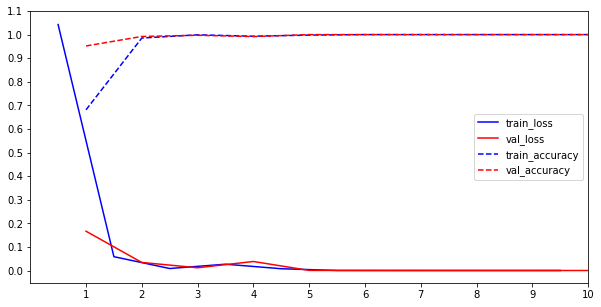

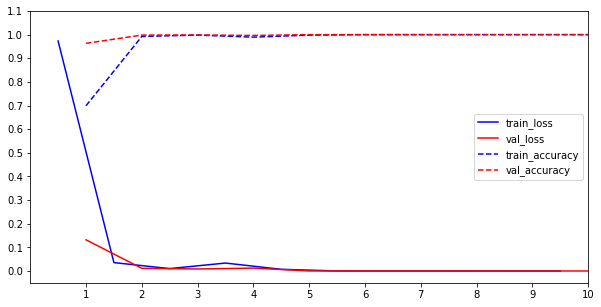

In [70]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

#### We choose to use filter sizes of (5x5)
#### Dropout

In [71]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.6012 - accuracy: 0.4987

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 32s 50ms/step - loss: 1.6005 - accuracy: 0.4989 - val_loss: 0.2593 - val_accuracy: 0.9130
Epoch 2/10
610/610 [==============================] - ETA: 0s - loss: 0.3124 - accuracy: 0.8923

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 31s 51ms/step - loss: 0.3124 - accuracy: 0.8923 - val_loss: 0.0466 - val_accuracy: 0.9966
Epoch 3/10
610/610 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9505

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.1455 - accuracy: 0.9505 - val_loss: 0.0144 - val_accuracy: 0.9991
Epoch 4/10
610/610 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9710

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 31s 51ms/step - loss: 0.0889 - accuracy: 0.9710 - val_loss: 0.0031 - val_accuracy: 0.9999
Epoch 5/10
610/610 [==============================] - 29s 47ms/step - loss: 0.0653 - accuracy: 0.9778 - val_loss: 0.0052 - val_accuracy: 0.9999
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9811

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 31s 50ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0029 - val_accuracy: 0.9999
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9848

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 31s 51ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 3.1899e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9844

INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-0\assets


610/610 [==============================] - 32s 52ms/step - loss: 0.0471 - accuracy: 0.9844 - val_loss: 2.7324e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - 28s 46ms/step - loss: 0.0357 - accuracy: 0.9876 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 10/10
610/610 [==============================] - 28s 47ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 5.6607e-04 - val_accuracy: 0.9997
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 2.2141 - accuracy: 0.3093

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 32s 52ms/step - loss: 2.2141 - accuracy: 0.3093 - val_loss: 0.5078 - val_accuracy: 0.8758
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.5916 - accuracy: 0.7948

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 31s 51ms/step - loss: 0.5916 - accuracy: 0.7949 - val_loss: 0.1179 - val_accuracy: 0.9776
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8884

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 34s 55ms/step - loss: 0.3187 - accuracy: 0.8884 - val_loss: 0.0466 - val_accuracy: 0.9938
Epoch 4/10
610/610 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.9287

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 31s 50ms/step - loss: 0.2088 - accuracy: 0.9287 - val_loss: 0.0161 - val_accuracy: 0.9990
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.1634 - accuracy: 0.9440

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 31s 50ms/step - loss: 0.1634 - accuracy: 0.9440 - val_loss: 0.0086 - val_accuracy: 0.9996
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9548

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 30s 49ms/step - loss: 0.1386 - accuracy: 0.9548 - val_loss: 0.0031 - val_accuracy: 0.9999
Epoch 7/10
609/610 [============================>.] - ETA: 0s - loss: 0.1109 - accuracy: 0.9621

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.1109 - accuracy: 0.9621 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - 29s 48ms/step - loss: 0.1005 - accuracy: 0.9680 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9654

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.1008 - accuracy: 0.9654 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.0845 - accuracy: 0.9704

INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-1\assets


610/610 [==============================] - 35s 58ms/step - loss: 0.0844 - accuracy: 0.9705 - val_loss: 4.9845e-04 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 2.5837 - accuracy: 0.2004

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 34s 54ms/step - loss: 2.5837 - accuracy: 0.2004 - val_loss: 1.0219 - val_accuracy: 0.7443
Epoch 2/10
610/610 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.6194

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 30s 49ms/step - loss: 1.1156 - accuracy: 0.6194 - val_loss: 0.3684 - val_accuracy: 0.9257
Epoch 3/10
610/610 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.7620

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.6717 - accuracy: 0.7620 - val_loss: 0.1732 - val_accuracy: 0.9750
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.4892 - accuracy: 0.8308

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 33s 54ms/step - loss: 0.4892 - accuracy: 0.8308 - val_loss: 0.1020 - val_accuracy: 0.9845
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8646

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 30s 49ms/step - loss: 0.4003 - accuracy: 0.8646 - val_loss: 0.0500 - val_accuracy: 0.9927
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.3371 - accuracy: 0.8861

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.3371 - accuracy: 0.8861 - val_loss: 0.0433 - val_accuracy: 0.9979
Epoch 7/10
610/610 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.9041

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 34s 56ms/step - loss: 0.2811 - accuracy: 0.9041 - val_loss: 0.0202 - val_accuracy: 0.9990
Epoch 8/10
610/610 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9135

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 34s 56ms/step - loss: 0.2606 - accuracy: 0.9135 - val_loss: 0.0160 - val_accuracy: 0.9997
Epoch 9/10
610/610 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9218

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 32s 53ms/step - loss: 0.2314 - accuracy: 0.9218 - val_loss: 0.0121 - val_accuracy: 0.9981
Epoch 10/10
609/610 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9246

INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


INFO:tensorflow:Assets written to: models\experiment-dropout-2\assets


610/610 [==============================] - 30s 50ms/step - loss: 0.2280 - accuracy: 0.9247 - val_loss: 0.0088 - val_accuracy: 1.0000


In [72]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 1.0000


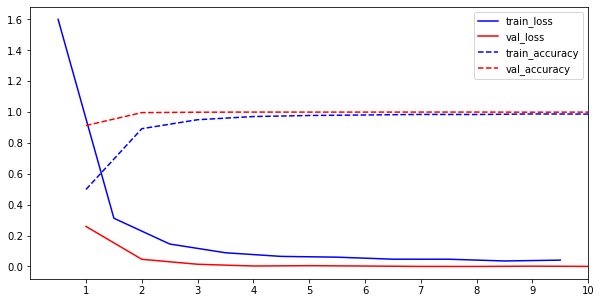

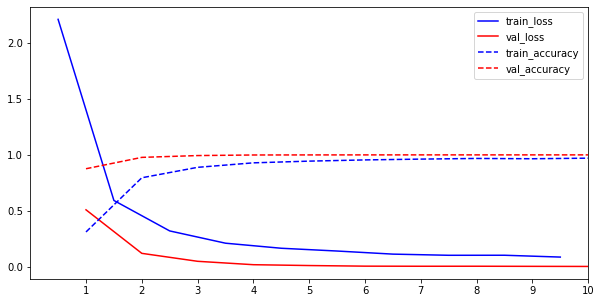

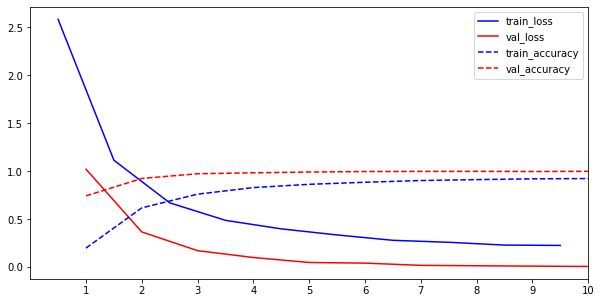

In [73]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

#### Select Model 1
#### Data Augmentation

In [74]:
# Sample Code

data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
# Add the layers from the above model

#### Improves the models performance by decreasing the tendency to overfit

#### Other Hyperparameters to try
#### Batch Normalization - It normalizes the layer inputs
#### Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
#### Number of units in the dense layer and number of dense layers
#### Replacing the MaxPooling Layer with a convolution layer having a stride > 1
#### Optimizers
#### Learning rate of the optimizer
#### Visualising the final model

In [87]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

### Performance on the Test Set

In [77]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [78]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [79]:
evaluate_model(best_model, X_test, y_test, label_binarizer)


225/225 [==============================] - 2s 8ms/step - loss: 12.6057 - accuracy: 0.9732
Loss: 12.606 Accuracy: 0.973


### Accuracy :97%

In [81]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [82]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [83]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [84]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 2s 8ms/step - loss: 0.0543 - accuracy: 0.9809
Loss: 0.054 Accuracy: 0.981


### Accuracy:98%
